# Part 1: Find the total number of cans for different even grid packing arrangements.

In [12]:
cans_x = range(1, 51)
crate_height = 560
crate_width = 828.677

In [13]:
max_radius = []

for n in cans_x:
    max_radius.append(crate_width / (2 * n))

Text(0.5, 0, 'number of cans in direction')

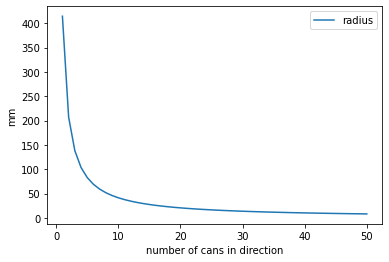

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

plt.plot(cans_x, max_radius)
plt.ylabel("mm")
plt.legend(["radius"])
plt.xlabel("number of cans in direction")

In [15]:
height = []
cans_y = []

for n in cans_x:
    required_height = 500000 / (math.pi * pow(max_radius[n-1], 2))
    height.append(required_height)
    cans_y.append(math.floor(560 / required_height))

In [16]:
cans_total = []
volume = []

for n in cans_x:
    max_total_cans = pow(cans_x[n-1], 2) * cans_y[n-1]

    cans_total.append(max_total_cans)
    volume.append(max_total_cans * 500)

Text(0.5, 0, 'number of cans in x direction')

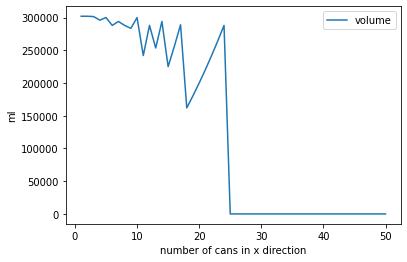

In [17]:
plt.clf()

plt.plot(cans_x, volume)
plt.ylabel("ml")
plt.legend(["volume"])
plt.xlabel("number of cans in x direction")

In [18]:
item = 8

print(cans_x[item])
print(cans_y[item])
print(max_radius[item])
print(height[item])
print(cans_total[item])
print(volume[item])

9
7
46.03761111111111
75.09215563384576
567
283500


# Part 2: Find the optimal number of cans per layer based on the required can radius.

In [19]:
import pandas as pd
import os

path = os.path.join(os.path.abspath(''), "circle_radius.csv")
circle_radius = pd.read_csv(path)


In [20]:
crate_width = 828.677
can_radius = 43.0127

# Scale all values to side length of crate
circle_radius["radius"] = circle_radius["radius"] * crate_width

# Then find the closest radius larger than or equal to our requirement
suitable_arrangements = circle_radius[circle_radius["radius"] > can_radius]

best_arrangement = [suitable_arrangements["cans"].iloc[-1], suitable_arrangements["radius"].iloc[-1]]

print(best_arrangement)

[99, 43.073475656757175]


In [21]:
path = os.path.join(os.path.abspath(''), "99_cans_points.csv")
points = pd.read_csv(path)

# Scale all values to side length of crate
points["x"] = points["x"] * crate_width
points["y"] = points["y"] * crate_width

# Save to file
new_path = os.path.join(os.path.abspath(''), "99_cans_points_scaled.csv")
points.to_csv(new_path, index_label="index")